# Data preparation

## Import of required libraries
Those libraries are used in the notebook to perform the data preparation. Maybee you need to install them first with `pip install <library>`.  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline


# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical


pd.set_option('display.max_colwidth', 100)

c:\Users\olive\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First I want to import the file

In [23]:
all_data_df = pd.read_csv('../04_Data Cleansing/20_model')
all_data_df.head()

PermissionError: [Errno 13] Permission denied: '../07_Anwendung in Machine Learning/'

In [3]:
all_data_df.shape

(47692, 2)

In [4]:
all_data_df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [5]:
all_data_df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying


As next we should check if there are some missing values or not.

In [6]:
count = all_data_df.isna().sum()
precentange = all_data_df.isna().mean().round(4) * 100

dfMissing = pd.DataFrame({'count': count, 'precentange': precentange})
dfMissing.sort_values('count', ascending=False)

,count,precentange
tweet_text,0,0.0
cyberbullying_type,0,0.0


In [7]:
all_data_df.groupby(['cyberbullying_type'])['cyberbullying_type'].describe()[['count']]

,count
cyberbullying_type,
age,7992
ethnicity,7961
gender,7973
not_cyberbullying,7945
other_cyberbullying,7823
religion,7998


In [8]:
#calculate length of the comment
all_data_df['length'] = all_data_df['tweet_text'].apply(len)
all_data_df.head()

,tweet_text,cyberbullying_type,length
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,115
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,103
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,103


In [9]:
temp = all_data_df.groupby('cyberbullying_type').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,cyberbullying_type,tweet_text
5,religion,7998
0,age,7992
2,gender,7973
1,ethnicity,7961
3,not_cyberbullying,7945
4,other_cyberbullying,7823


<Axes: xlabel='cyberbullying_type', ylabel='count'>

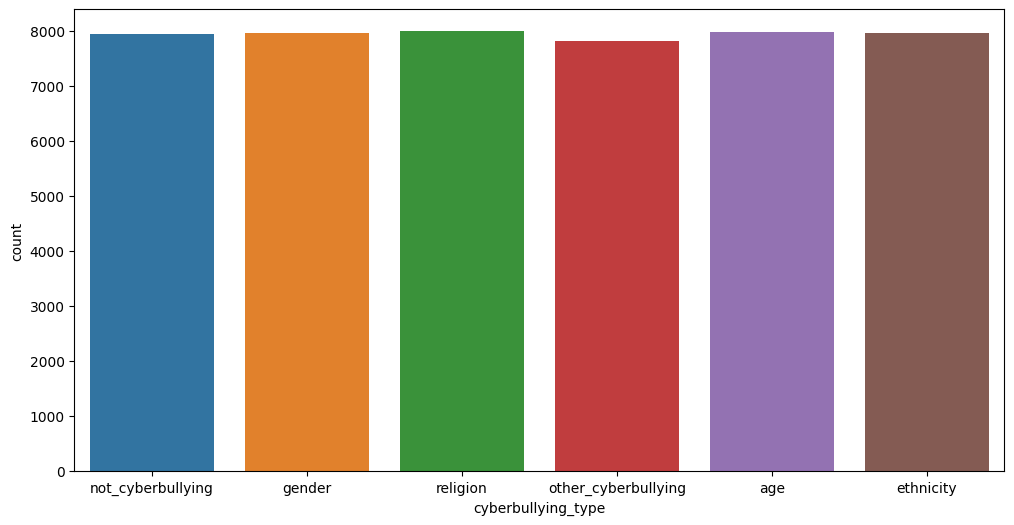

In [11]:
from plotly import graph_objs as go
plt.figure(figsize=(12,6))
sns.countplot(x='cyberbullying_type',data=all_data_df)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'ethnicity'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'not_cyberbullying'}>],
       [<Axes: title={'center': 'other_cyberbullying'}>,
        <Axes: title={'center': 'religion'}>]], dtype=object)

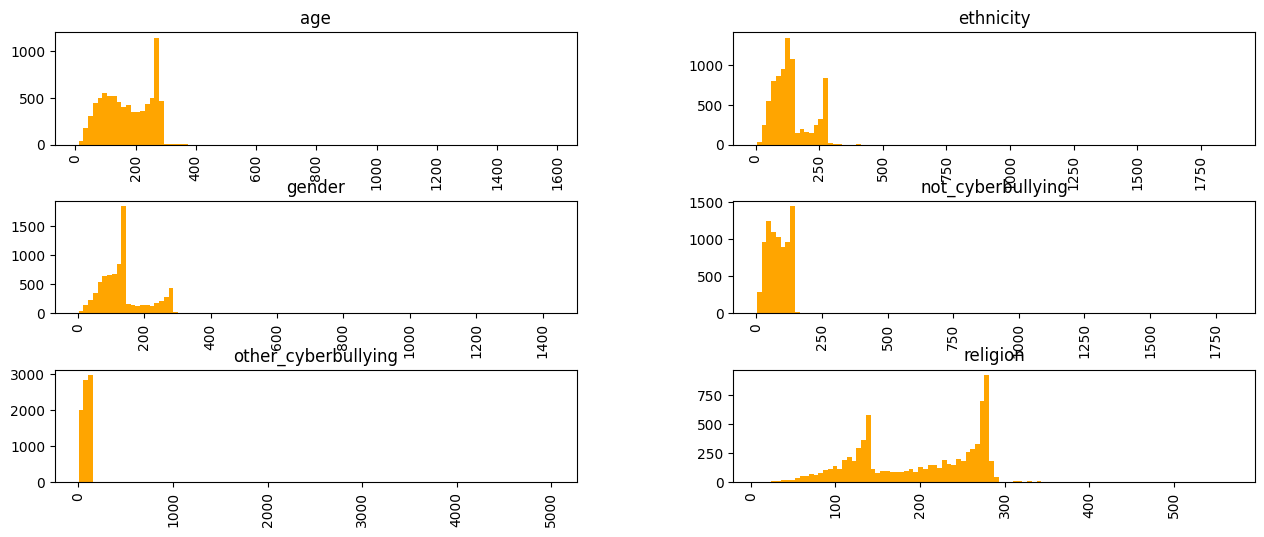

In [12]:
all_data_df.hist(column='length',by='cyberbullying_type',figsize=(15,6), bins=100,color='orange')

In [14]:
exclude = set(",.:;'\"-?!/´`%#")
def removePunctuation(txt):
    return ''.join([(c if c not in exclude else " ") for c in txt])
    
def removeNumbers(txt):
    return ''.join(c for c in txt if not c.isnumeric())

In [15]:
all_data_df['cleaned'] = all_data_df['tweet_text'].apply(lambda x: removePunctuation(x))
all_data_df.head()

,tweet_text,cyberbullying_type,length,cleaned
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,In other words katandandre your food was crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,115,Why is aussietv so white MKR theblock ImACelebrityAU today sunrise studio10 Neighbours ...
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,@XochitlSuckkks a classy whore Or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,103,@Jason_Gio meh P thanks for the heads up but not too concerned about another angry dude on t...
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,103,@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account Like Islam it is al...


In [16]:
all_data_df['cleaned'] = all_data_df['cleaned'].apply(lambda x: removeNumbers(x))
all_data_df.head()

,tweet_text,cyberbullying_type,length,cleaned
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,In other words katandandre your food was crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,115,Why is aussietv so white MKR theblock ImACelebrityAU today sunrise studio Neighbours W...
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,@XochitlSuckkks a classy whore Or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,103,@Jason_Gio meh P thanks for the heads up but not too concerned about another angry dude on t...
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,103,@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account Like Islam it is al...


In [18]:
from collections import Counter

results = Counter()
all_data_df.cleaned.str.split().apply(results.update)

most = results.most_common()
print(most[:10])

[('the', 27758), ('a', 23528), ('to', 22969), ('and', 19858), ('I', 19717), ('you', 16292), ('of', 15117), ('in', 14242), ('is', 13558), ('that', 11643)]


In [19]:
all_data_df.head()

,tweet_text,cyberbullying_type,length,cleaned
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,In other words katandandre your food was crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,115,Why is aussietv so white MKR theblock ImACelebrityAU today sunrise studio Neighbours W...
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,@XochitlSuckkks a classy whore Or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,103,@Jason_Gio meh P thanks for the heads up but not too concerned about another angry dude on t...
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,103,@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account Like Islam it is al...


## Data export
The df will now be exported as an csv file.

In [22]:
all_data_df.to_csv('../04_Data Cleansing/20_model_evaluation/20_cleaned_data.csv')